# **Importing Libraries**

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [3]:
from keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from keras.models import Model,Sequential
from tensorflow.keras.optimizers import Adam,SGD,RMSprop
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

# **Displaying Images**

In [4]:
picture_size = 48
folder_path = "../input/fer2013"

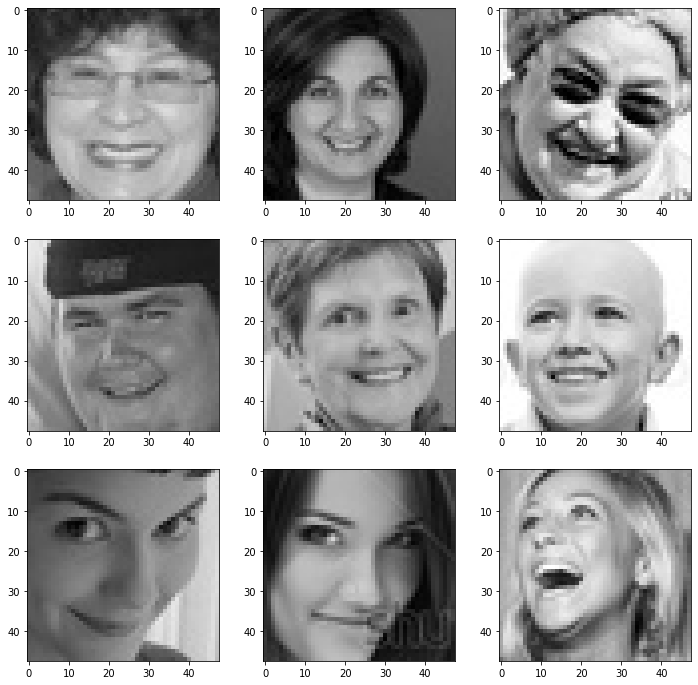

In [5]:
expression = 'happy'

plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(folder_path+"/"+"train/"+expression+"/"+
                  os.listdir(folder_path +"/"+"train/" + expression)[i], target_size=(picture_size, picture_size))
    plt.imshow(img)   
plt.show()

# **Making Training and Validation Data**

In [6]:
batch_size  = 150

datagen_train  = ImageDataGenerator()
datagen_val = ImageDataGenerator()

train_set = datagen_train.flow_from_directory(folder_path+"/"+"train",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=True)


test_set = datagen_val.flow_from_directory(folder_path+"/"+"test",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=False)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


# **Model Creation**

In [23]:
no_of_classes = 7

model = Sequential()

#1st CNN layer
model.add(Conv2D(64,(3,3),padding = 'same',input_shape = (48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

#2nd CNN layer
model.add(Conv2D(128,(5,5),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#3rd CNN layer
model.add(Conv2D(512,(3,3),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#4th CNN layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

#Fully connected 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))


# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(no_of_classes, activation='softmax'))



opt = Adam(lr = 0.0001)
model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 48, 48, 64)        640       
_________________________________________________________________
batch_normalization_12 (Batc (None, 48, 48, 64)        256       
_________________________________________________________________
activation_12 (Activation)   (None, 48, 48, 64)        0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 24, 24, 64)        0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 24, 24, 128)       204928    
_________________________________________________________________
batch_normalization_13 (Batc (None, 24, 24, 128)      

/opt/conda/lib/python3.7/site-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


# **Model Callbacks**

**ModelCheckpoint this function of keras callbacks is used to save the model after every epoch. We just need to define a few of the parameters like where we want to store, what we want to monitor, define the path and then assigned val_accuracy to be monitored**

**EarlyStopping is used to stop the model training in between. This function is very helpful when your models get overfitted. It is used to stop the model as soon as it gets overfitted. We defined what to monitor while saving the model checkpoints. We also need to define the factor we want to monitor while using the early stopping function. We will monitor validation loss for stopping the model training.**

**ReduceLearningRate when a metrics has stopped improving.Models often benefit from reducing the learning rate by a factor of 2-10 once learning stagnates. This callback monitors a quantity and if no improvement is seen for a 'patience' number of epochs, the learning rate is reduced.**

In [24]:
#Using callbacks and `early stopping` for avoiding overfitting of training data and `ReduceLROnPlateau` for learning rate

checkpoint = ModelCheckpoint("./model_cnn.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=5,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=5,
                              verbose=1,
                              min_delta=0.0001)

callbacks_list = [early_stopping,checkpoint,reduce_learningrate]



model.compile(loss='categorical_crossentropy',
              optimizer = Adam(lr=0.001),
              metrics=['accuracy'])

# **Fitting the data with Training and Test Data**

****

In [25]:
history = model.fit_generator(train_set,
                              validation_data= test_set,
                              epochs = 45,
                              steps_per_epoch =train_set.n//train_set.batch_size,
                              validation_steps = test_set.n//test_set.batch_size,
                             callbacks=callbacks_list
                        
                              )



/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/45
191/191 [==============================] - 27s 135ms/step - loss: 1.7957 - accuracy: 0.3111 - val_loss: 1.7408 - val_accuracy: 0.3043
Epoch 2/45
191/191 [==============================] - 26s 135ms/step - loss: 1.4471 - accuracy: 0.4467 - val_loss: 1.3803 - val_accuracy: 0.4631
Epoch 3/45
191/191 [==============================] - 26s 134ms/step - loss: 1.2881 - accuracy: 0.5096 - val_loss: 1.4371 - val_accuracy: 0.4685
Epoch 4/45
191/191 [==============================] - 27s 140ms/step - loss: 1.1944 - accuracy: 0.5426 - val_loss: 1.3578 - val_accuracy: 0.4786
Epoch 5/45
191/191 [==============================] - 27s 142ms/step - loss: 1.1258 - accuracy: 0.5693 - val_loss: 1.1775 - val_accuracy: 0.5565
Epoch 6/45
191/191 [==============================] - 26s 137ms/step - loss: 1.0797 - accuracy: 0.5899 - val_loss: 1.1952 - val_accuracy: 0.5383
Epoch 7/45
191/191 [==============================] - 26s 136ms/step - loss: 1.0286 - accuracy: 0.6082 - val_loss: 1.1218 - val_ac

**H5 is a file format to store structured data. Keras saves models in this format as it can easily store the weights and model configuration in a single file.**

In [26]:
# saving the model as h5 file
model.save('model_cnn.h5')

**Saving dl model in json format file**

In [29]:
# saving model in json file

from tensorflow.keras.models import model_from_json
model_in_json  = model.to_json()
with open('model.json','w') as json_file:
  json_file.write(model_in_json)

**Visualization of Accuracy and Loss**

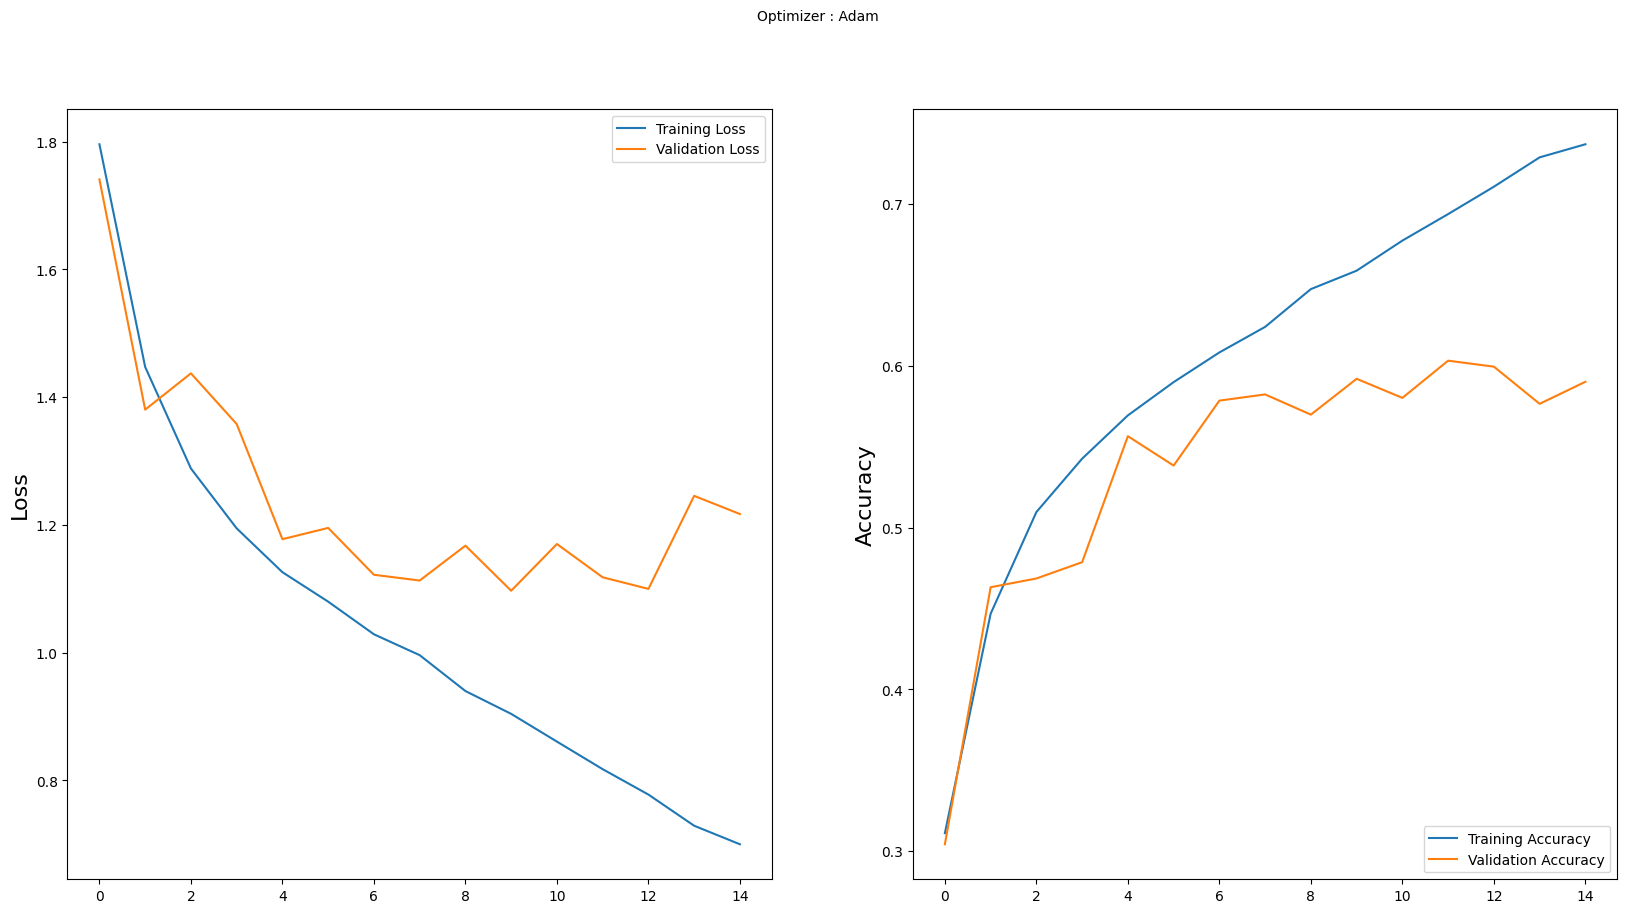

In [30]:
plt.style.use('default')

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()




# **Conclusion**

* **The total epochs considered initially for the training the images was 45.Too many epochs can lead to overfitting of the training dataset, whereas too few may result in an underfit model. However by usage of early stopping which allowed  to specify an arbitrary number of training epochs and stop training once the model performance stops improving on a hold out validation dataset**.
* **The model created with CNN layers gave training accuracy 73.69% and validation accuracy 59.01% after 15 epochs**
* **The Fer2013 dataset used had less number of disgust images. So the model is unable to distinguish the disgust emotion.**